In [0]:
import pandas as pd
import numpy as np

In [0]:
# Import the Chapel Hill data
df_work = pd.read_csv("pedestrian-crashes-chapel-hill-region_imported.txt",
                     sep='\t')

# df_work = pd.read_csv("/Users/danoand/Documents/Companies/LambdaSchool/Build_Project_02/data/pedestrian-crashes-chapel-hill-region_imported.txt",
#                    sep='\t')

In [0]:
# Profile the "work" dataframe
from pandas_profiling import ProfileReport

profile = ProfileReport(df_work, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_file(output_file="/Users/danoand/Documents/Companies/LambdaSchool/Build_Project_02/data/ChapelHillAccidents.html")

In [0]:
# Define "ante" columns (data that can be reasonably known prior to the event)
# Notes:
#   - removed the lat/long column 
categories_ante = [
    'City',
    'County',
    'CrashHour',
    'CrashMonth',
    'Development',
    'LightCond',
    'Locality',
    'NumLanes',
    'RdCharacte',
    'RdClass',
    'RdConditio',
    'RdConfig',
    'RdDefects',
    'RdFeature',
    'RdSurface',
    'Region',
    'RuralUrban',
    'SpeedLimit',
    'TraffCntrl',
    'Weather',
    'Workzone',
    'PedInjury']        # Source for the target data

In [79]:
# Define a dataframe with "ante" data
df_ante = df_work[categories_ante]

df_ante.sample(10)

,City,County,CrashHour,CrashMonth,Development,LightCond,Locality,NumLanes,RdCharacte,RdClass,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,PedInjury
22839,Raleigh,Wake,17,June,Commercial,Daylight,Urban (>70% Developed),2 lanes,Straight - Level,Public Vehicular Area,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,5 - 15 MPH,No Control Present,Clear,No,B: Suspected Minor Injury
4757,Charlotte,Mecklenburg,6,November,Commercial,Dark - Lighted Roadway,Urban (>70% Developed),Unknown,Straight - Grade,Public Vehicular Area,Dry,"Two-Way, Not Divided",None,"Driveway, Public",Coarse Asphalt,Piedmont,Urban,20 - 25 MPH,No Control Present,Clear,No,B: Suspected Minor Injury
25563,None - Rural Crash,Orange,14,July,"Farms, Woods, Pastures",Daylight,Rural (<30% Developed),2 lanes,Straight - Grade,Interstate,Wet,"Two-Way, Divided, Positive Median Barrier",Obstruction In Roadway,No Special Feature,Grooved Concrete,Piedmont,Rural,60 - 75 MPH,No Control Present,Rain,No,B: Suspected Minor Injury
21623,Lillington,Harnett,13,August,Commercial,Daylight,Mixed (30% To 70% Developed),4 lanes,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Coastal,Rural,20 - 25 MPH,Stop And Go Signal,Clear,No,A: Suspected Serious Injury
4215,Charlotte,Mecklenburg,16,September,"Farms, Woods, Pastures",Daylight,Rural (<30% Developed),2 lanes,Straight - Hillcrest,Public Vehicular Area,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,No Control Present,Cloudy,No,C: Possible Injury
8436,None - Rural Crash,Gaston,20,November,"Farms, Woods, Pastures",Dark - Roadway Not Lighted,Rural (<30% Developed),2 lanes,Straight - Grade,NC Route,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Rural,40 - 45 MPH,"Double Yellow Line, No Passing Zone",Clear,No,C: Possible Injury
28041,Monroe,Union,22,December,Residential,Dark - Lighted Roadway,Urban (>70% Developed),2 lanes,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,Stop Sign,Clear,No,C: Possible Injury
18346,Greenville,Pitt,13,May,Commercial,Daylight,Urban (>70% Developed),2 lanes,Straight - Level,Local Street,Dry,"Two-Way, Divided, Unprotected Median",None,T-Intersection,Coarse Asphalt,Coastal,Urban,30 - 35 MPH,Stop Sign,Clear,No,B: Suspected Minor Injury
9168,Raleigh,Wake,8,October,Residential,Daylight,Urban (>70% Developed),4 lanes,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Coarse Asphalt,Piedmont,Urban,40 - 45 MPH,No Control Present,Clear,No,B: Suspected Minor Injury
31582,Greensboro,Guilford,11,September,Commercial,Daylight,Urban (>70% Developed),2 lanes,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,"Driveway, Private",Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,No Control Present,Clear,No,C: Possible Injury


In [80]:
df_ante['CrashHour'].unique()

array([22,  8, 19, 13, 15, 20, 14,  7, 18, 10, 16, 11, 12,  6, 21,  9,  5,
        0, 17,  2, 23,  1,  4,  3])

In [0]:
# Display some exploratory plots
import matplotlib.pyplot as plt

tmp_outcm = df_ante['PedInjury'].replace({
    "K: Killed": "Death or Serious Injury",
    "Unknown Injury": "Unknown",
    "C: Possible Injury": "Possible Injury",
    "B: Suspected Minor Injury": "Minor Injury",
    "O: No Injury": "No Injury",
    "A: Suspected Serious Injury": "Death or Serious Injury"})

tmp_wthr = df_ante['Weather'].replace({
    "Snow, Sleet, Hail, Freezing Rain/Drizzle": "Snow/Mix",
    "Fog, Smog, Smoke": "Fog/Smog"})

tmp_wthr.fillna("Other", inplace=True)

tmp_hour = df_ante['CrashHour']

In [82]:
tmp_outcm.value_counts()

Possible Injury            13787
Minor Injury               11952
Death or Serious Injury     4587
No Injury                   2021
Unknown                     1360
Name: PedInjury, dtype: int64

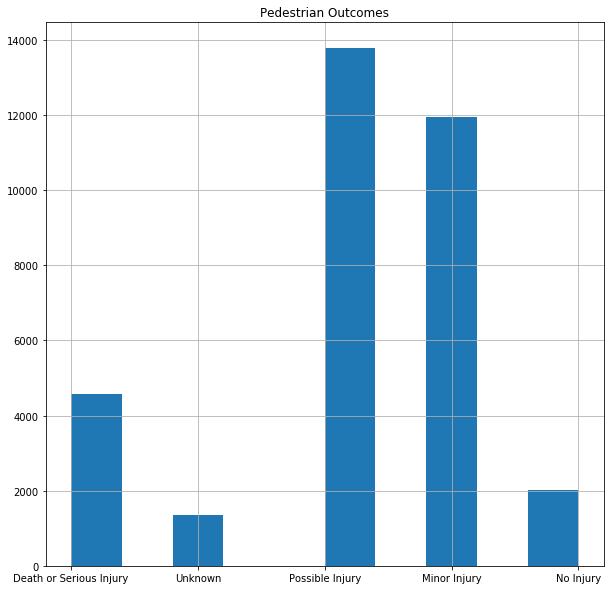

In [83]:
plt.figure(figsize=(10, 10))
plt.title(f'Pedestrian Outcomes')

plt.grid(True)
plt.hist(tmp_outcm);

In [84]:
tmp_df_wthr_outc = pd.DataFrame({"Weather": tmp_wthr, "Outcome": tmp_outcm})

tmp_srs_killed_by_weather = tmp_df_wthr_outc[tmp_df_wthr_outc['Outcome']=='Death or Serious Injury']['Weather'].value_counts()

pd.DataFrame(tmp_srs_killed_by_weather)

,Weather
Clear,3474
Cloudy,691
Rain,346
Fog/Smog,48
Snow/Mix,17
Other,11


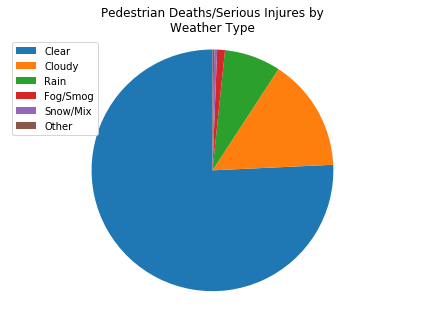

In [85]:
labels = list(tmp_srs_killed_by_weather.index)
counts = list(tmp_srs_killed_by_weather)

patches, texts = plt.pie(counts, startangle=90)
plt.legend(patches, labels, loc="best")

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.title('Pedestrian Deaths/Serious Injures by\nWeather Type')
plt.show()

In [0]:
tmp_dict = {}

# count_badoutcomes_by_hour tallies up the deaths/serious injuries by hour and
#   stores those counts in a pyton dict
def count_badoutcomes_by_hour(row):
  if row['Outcome'] == "Death or Serious Injury":
    key = row['Hour']
    if key in tmp_dict:
      tmp_dict[key] = tmp_dict[key] + 1

    if not(key in tmp_dict):
      tmp_dict[key] = 0

  return
  

In [88]:
df_tmp_wth_hour_otcm = pd.DataFrame({
    "Weather": tmp_wthr,
    "Hour": tmp_hour,
    "Outcome": tmp_outcm})

tmp_dict_hour_bad_otcms = df_tmp_wth_hour_otcm.apply(count_badoutcomes_by_hour, axis=1)

tmp_dict

{0: 160,
 1: 158,
 2: 172,
 3: 107,
 4: 108,
 5: 159,
 6: 175,
 7: 142,
 8: 108,
 9: 77,
 10: 76,
 11: 111,
 12: 107,
 13: 137,
 14: 125,
 15: 172,
 16: 148,
 17: 241,
 18: 311,
 19: 374,
 20: 406,
 21: 429,
 22: 330,
 23: 230}

In [94]:
df_temp_hour_badotcm_count = pd.DataFrame(columns=['Hour', 'BadCount'])
for item in tmp_dict.items():
    df_temp_hour_badotcm_count = df_temp_hour_badotcm_count.append({'Hour': item[0], 'BadCount': item[1]}, ignore_index=True)

df_temp_hour_badotcm_count

,Hour,BadCount
0,22,330
1,20,406
2,7,142
3,15,172
4,16,148
5,0,160
6,2,172
7,21,429
8,8,108
9,14,125


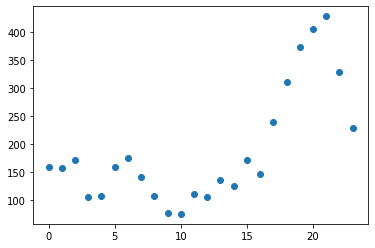

In [96]:
plt.scatter(df_temp_hour_badotcm_count['Hour'], df_temp_hour_badotcm_count['BadCount']);

In [0]:
# Profile the df_ante dataframe
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df_work, title='Pandas Profiling Report', html={'style':{'full_width':True}})
# profile.to_file(output_file="/Users/danoand/Documents/Companies/LambdaSchool/Build_Project_02/data/ChapelHillAccidents.html")

In [0]:
# Split the data into training, validation, and testing datasets
from sklearn.model_selection import train_test_split
df_ante_train, df_ante_test = train_test_split(df_ante, train_size=0.85, test_size=0.15, 
                              stratify=df_ante['PedInjury'], random_state=42)

print(f'Shape of df_ante_train: {df_ante_train.shape}; Shape of df_ante_test: {df_ante_test.shape}')

Shape of df_ante_train: (28650, 22); Shape of df_ante_test: (5057, 22)


In [0]:
# Split the train data into a training subset and a validation subset
df_ante_train, df_ante_val = train_test_split(df_ante_train, test_size=len(df_ante_test), 
                              stratify=df_ante_train['PedInjury'], random_state=42)

print(f'Shape of df_ante_train: {df_ante_train.shape}; Shape of df_ante_val: {df_ante_val.shape}; Shape of df_ante_test: {df_ante_test.shape}')

Shape of df_ante_train: (23593, 22); Shape of df_ante_val: (5057, 22); Shape of df_ante_test: (5057, 22)


In [0]:
# Breakdown the target attribute by class value
df_ante_train['PedInjury'].value_counts(normalize=True)

C: Possible Injury             0.409020
B: Suspected Minor Injury      0.354597
A: Suspected Serious Injury    0.072140
K: Killed                      0.063917
O: No Injury                   0.059975
Unknown Injury                 0.040351
Name: PedInjury, dtype: float64

In [0]:
# Wrangle the modeling data
outcome_serious = ['K: Killed', 'A: Suspected Serious Injury']

# has_fatality is a function that returns a boolean value if the inbound value represents a serious outcome (True) or not (False)
def has_serious_outcome(val):
  if (val in outcome_serious): 
    return True

  return False

# wrangle returns a dataframe with updated/created columns for a given input dataframe 
def wrangle(DF):
  X = DF.copy()

  # Create a boolean target column reflecting an outcome (serious injury or not)
  X['ped_serious_outcome'] = X['PedInjury'].apply(has_serious_outcome)

  # Convert the CrashHour column to a string (from an int)
  X['CrashHour'] = X['CrashHour'].apply(str)

  # List columns to be dropped
  cols_drop = ['PedInjury'] # PedInjury - use the engineered 'ped_fatality' column

  # Drop undesired columns
  X = X.drop(columns=cols_drop)

  return X

In [0]:
# Wrangle the training, validation, and test datasets
df_wrgl_train = wrangle(df_ante_train)
df_wrgl_val   = wrangle(df_ante_val)
df_wrgl_test  = wrangle(df_ante_test)

print(f'Shape of df_wrgl_train: {df_wrgl_train.shape}; Shape of df_wrgl_val: {df_wrgl_val.shape}; Shape of df_wrgl_test: {df_wrgl_test.shape}\n')

print(f'\nColumn Data Types:\n{df_wrgl_val.dtypes}')

Shape of df_wrgl_train: (23593, 22); Shape of df_wrgl_val: (5057, 22); Shape of df_wrgl_test: (5057, 22)


Column Data Types:
City                   object
County                 object
CrashHour              object
CrashMonth             object
Development            object
LightCond              object
Locality               object
NumLanes               object
RdCharacte             object
RdClass                object
RdConditio             object
RdConfig               object
RdDefects              object
RdFeature              object
RdSurface              object
Region                 object
RuralUrban             object
SpeedLimit             object
TraffCntrl             object
Weather                object
Workzone               object
ped_serious_outcome      bool
dtype: object


In [0]:
df_wrgl_train.sample(5)

,City,County,CrashHour,CrashMonth,Development,LightCond,Locality,NumLanes,RdCharacte,RdClass,...,RdDefects,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,ped_serious_outcome
835,Fayetteville,Cumberland,16,October,Commercial,Daylight,Urban (>70% Developed),4 lanes,Straight - Level,Local Street,...,None,No Special Feature,Coarse Asphalt,Coastal,Urban,50 - 55 MPH,No Control Present,Clear,No,False
2381,Charlotte,Mecklenburg,18,February,Commercial,Dark - Lighted Roadway,Urban (>70% Developed),2 lanes,Straight - Level,Public Vehicular Area,...,None,No Special Feature,Smooth Asphalt,Piedmont,Urban,Unknown,No Control Present,Clear,No,False
25925,Charlotte,Mecklenburg,3,August,Commercial,Dark - Lighted Roadway,Urban (>70% Developed),4 lanes,Straight - Level,Local Street,...,None,No Special Feature,Smooth Asphalt,Piedmont,Urban,40 - 45 MPH,No Control Present,Clear,No,False
2530,Rocky Mount,Edgecombe,18,June,Residential,Daylight,Urban (>70% Developed),2 lanes,Straight - Level,Local Street,...,None,No Special Feature,Coarse Asphalt,Coastal,Urban,30 - 35 MPH,No Control Present,Clear,No,False
20150,Raleigh,Wake,20,October,Commercial,Dark - Lighted Roadway,Urban (>70% Developed),Unknown,Missing,Local Street,...,None,Missing,Missing,Piedmont,Urban,40 - 45 MPH,No Control Present,Clear,No,False


In [0]:
# Construct the modeling datasets
target = 'ped_serious_outcome'
X_train = df_wrgl_train.drop(columns=target)
y_train = df_wrgl_train[target]

X_val   = df_wrgl_val.drop(columns=target)
y_val   = df_wrgl_val[target]

X_test  = df_wrgl_test.drop(columns=target)
y_test  = df_wrgl_test[target]


print(f'\nValidation Column Data Types:\n{X_val.dtypes}')


Validation Column Data Types:
City           object
County         object
CrashHour      object
CrashMonth     object
Development    object
LightCond      object
Locality       object
NumLanes       object
RdCharacte     object
RdClass        object
RdConditio     object
RdConfig       object
RdDefects      object
RdFeature      object
RdSurface      object
Region         object
RuralUrban     object
SpeedLimit     object
TraffCntrl     object
Weather        object
Workzone       object
dtype: object


In [0]:
# Create a baseline prediction using a dummy classifier
from sklearn.dummy import DummyClassifier
clfr_dummy = DummyClassifier(strategy="stratified")

clfr_dummy.fit(X_train, y_train)
clfr_dummy.predict(X_train)

dummy_train_y_pred = clfr_dummy.predict(X_train)

print(f'Baseline prediction score for the training set is: {round(clfr_dummy.score(X_train, y_train), 4)}')

Baseline prediction score for the training set is: 0.7663


In [0]:
# Generate the classification report for the Dummy Classifier model
from sklearn.metrics import classification_report

print(f'Dummy (Baseline) Classification Report:\n\n{classification_report(y_train, dummy_train_y_pred)}')

Dummy (Baseline) Classification Report:

              precision    recall  f1-score   support

       False       0.86      0.86      0.86     20383
        True       0.14      0.14      0.14      3210

    accuracy                           0.77     23593
   macro avg       0.50      0.50      0.50     23593
weighted avg       0.77      0.77      0.77     23593



In [0]:
import category_encoders as ce 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

print(X_train.dtypes)

# Construct a modeling pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_jobs=-1, random_state=42)
)

# Fit the pipeline to the training dataset
pipeline.fit(X_train, y_train)

City           object
County         object
CrashHour      object
CrashMonth     object
Development    object
LightCond      object
Locality       object
NumLanes       object
RdCharacte     object
RdClass        object
RdConditio     object
RdConfig       object
RdDefects      object
RdFeature      object
RdSurface      object
Region         object
RuralUrban     object
SpeedLimit     object
TraffCntrl     object
Weather        object
Workzone       object
dtype: object


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['City', 'County', 'CrashHour',
                                      'CrashMonth', 'Development', 'LightCond',
                                      'Locality', 'NumLanes', 'RdCharacte',
                                      'RdClass', 'RdConditio', 'RdConfig',
                                      'RdDefects', 'RdFeature', 'RdSurface',
                                      'Region', 'RuralUrban', 'SpeedLimit',
                                      'TraffCntrl', 'Weather', 'Workzone'],
                                drop_invariant=False, handle_missing='valu...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                

In [0]:
# Calculate the accuracy using the validation data
print(f'The Validation Accuracy is: {round(pipeline.score(X_val, y_val), 4)}')

The Validation Accuracy is: 0.8655


In [0]:
# Generate the classification report for the Random Forest Classifier model
from sklearn.metrics import classification_report

y_val_pred = pipeline.predict(X_val)

print(f'Random Forest Classification Report:\n\n{classification_report(y_val, y_val_pred)}')

Random Forest Classification Report:

              precision    recall  f1-score   support

       False       0.87      0.99      0.93      4368
        True       0.53      0.11      0.18       689

    accuracy                           0.87      5057
   macro avg       0.70      0.55      0.55      5057
weighted avg       0.83      0.87      0.82      5057



In [0]:
# Construct the encoding and modeling objects for use in generating a pdp plot
trans_encode = make_pipeline(
    ce.OrdinalEncoder()
)

# Encode the train and validation attributes
X_train_trans_encode = trans_encode.fit_transform(X_train)
X_val_trans_encode   = trans_encode.fit_transform(X_val)

# Recreate the model
tmp_mdl = RandomForestClassifier(n_jobs=-1, random_state=42)
tmp_mdl.fit(X_train_trans_encode, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
# Calculate the permutation importance - Random Forest Classifier
import eli5
from eli5.sklearn import PermutationImportance

# Create a permutation importance object
prmuter = PermutationImportance(
    tmp_mdl,
    scoring='accuracy',
    n_iter=5,
    random_state=42)

# Compute feature importance
prmuter.fit(X_val_trans_encode, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [0]:
# List out the independent variables by importance
feature_names = X_val.columns.tolist()

# Display permutation importances
eli5.show_weights(
    prmuter,
    top=None,
    feature_names=feature_names)

Weight,Feature
0.0036 ± 0.0008,LightCond
0.0026 ± 0.0019,TraffCntrl
0.0020 ± 0.0015,CrashMonth
0.0018 ± 0.0028,RdClass
0.0014 ± 0.0014,SpeedLimit
0.0013 ± 0.0014,RdConfig
0.0011 ± 0.0011,Locality
0.0010 ± 0.0014,NumLanes
0.0008 ± 0.0028,Development
0.0008 ± 0.0026,CrashHour


In [0]:
# Generate a logistic regression model
from sklearn.linear_model import LogisticRegressionCV

# Construct a modeling pipeline
pipeline_logstc = make_pipeline(
    ce.OrdinalEncoder(),
    LogisticRegressionCV(cv=5, n_jobs=-1, random_state=42)
)

# Fit the pipeline to the training dataset
pipeline_logstc.fit(X_train, y_train)

# Calculate the accuracy using the validation data
print(f'The Validation Accuracy is: {round(pipeline_logstc.score(X_val, y_val), 4)}')


The Validation Accuracy is: 0.8638


In [0]:
pipeline_logstc[1]

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=42, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [0]:
# Generate the classification report for the Logistic Regression model
y_val_pred_lgtc = pipeline_logstc.predict(X_val)

print(f'Logistic Regression Classification Report:\n\n{classification_report(y_val, y_val_pred_lgtc)}')

Logistic Regression Classification Report:

              precision    recall  f1-score   support

       False       0.86      1.00      0.93      4368
        True       0.00      0.00      0.00       689

    accuracy                           0.86      5057
   macro avg       0.43      0.50      0.46      5057
weighted avg       0.75      0.86      0.80      5057



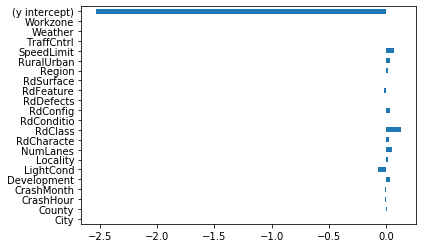

In [0]:
# Render the regression expression terms (coefficients, variables, and intercept)
%matplotlib inline
coefficients = pd.Series(pipeline_logstc[1].coef_[0], X_train.columns)
coefficients.sort_values()

tmp_series = pd.Series([pipeline_logstc[1].intercept_[0]], ['(y intercept)'])
coefficients = coefficients.append(tmp_series)
coefficients.plot.barh();

In [0]:
coefficients

City            -0.001330
County           0.008261
CrashHour       -0.010968
CrashMonth      -0.009142
Development      0.033361
LightCond       -0.068097
Locality         0.016585
NumLanes         0.050360
RdCharacte       0.027702
RdClass          0.128074
RdConditio       0.001557
RdConfig         0.031567
RdDefects       -0.001759
RdFeature       -0.015087
RdSurface       -0.004395
Region           0.014589
RuralUrban       0.031191
SpeedLimit       0.066307
TraffCntrl      -0.001861
Weather          0.002165
Workzone        -0.000079
(y intercept)   -2.531621
dtype: float64

In [0]:
coefficients.sort_values(ascending=False)

RdClass          0.128074
SpeedLimit       0.066307
NumLanes         0.050360
Development      0.033361
RdConfig         0.031567
RuralUrban       0.031191
RdCharacte       0.027702
Locality         0.016585
Region           0.014589
County           0.008261
Weather          0.002165
RdConditio       0.001557
Workzone        -0.000079
City            -0.001330
RdDefects       -0.001759
TraffCntrl      -0.001861
RdSurface       -0.004395
CrashMonth      -0.009142
CrashHour       -0.010968
RdFeature       -0.015087
LightCond       -0.068097
(y intercept)   -2.531621
dtype: float64